### 1. Data Processing

### Importing the required and necessary library packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Loading the data

In [2]:
df_diabetes = pd.read_csv("CE802_P2_Data.csv")

### checking the data if it is loaded perfectly or not

In [3]:
df_diabetes.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [4]:
df_diabetes.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
1495,37.7,33.90,5.80,6.62,10.71,362.58,-1.52,165,5.52,444.56,-1.96,15.30,10,6.93,8.76,False
1496,17.7,29.40,8.00,-0.48,3.54,-102.42,1.17,100,3.76,304.56,6.78,29.25,10,7.53,12.19,True
1497,11.7,2.13,-0.92,12.12,22.65,95.58,-0.57,10,8.47,76.56,-4.76,2.34,1,1.89,NaN,True
1498,11.7,2.94,0.64,11.68,17.49,146.58,1.47,20,8.57,116.56,-5.00,2.67,1,1.48,11.55,False
1499,27.7,30.75,7.76,1.84,8.67,137.58,-2.02,80,4.04,304.56,3.90,20.40,10,6.93,10.41,False


### plotting the heat map for the null values in column F15

<AxesSubplot:>

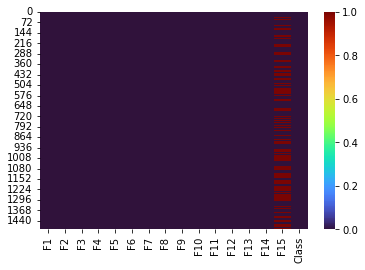

In [5]:
sns.heatmap(df_diabetes.isnull(),cmap ="turbo")

### checking if any other column is consist of null values

In [5]:
df_diabetes.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

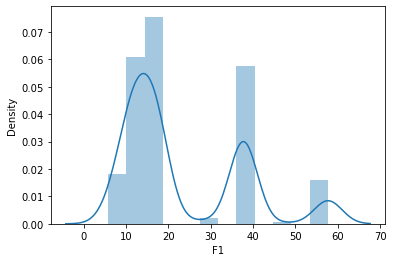

In [6]:
# distributions plot for feature 'F1'
sns.distplot(df_diabetes.F1)
plt.show()

In [7]:
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

In [8]:
df_diabetes.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

So there are no null values left in our data

### checking the shape of the data

In [9]:
print(df_diabetes.shape)
print(df_diabetes["Class"].unique())

(1500, 16)
[False  True]


There are 1500 rows and 16 predictor columns for the diabetes class. 

#### Now, we will split the dataset into training and test datasets and utilize various algorithms to predict the response variable class

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df_diabetes[df_diabetes.columns[:-1]]
Y = df_diabetes[df_diabetes.columns[-1]]
scaler = StandardScaler()
scaled= scaler.fit_transform(X)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.2, random_state=111)

<AxesSubplot:xlabel='F13', ylabel='count'>

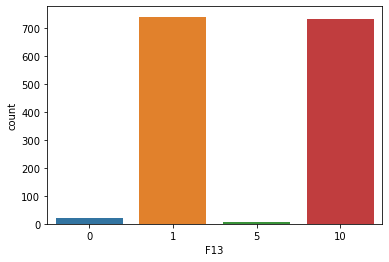

In [13]:
sns.countplot(x="F13", data=df_diabetes)

<AxesSubplot:xlabel='Class', ylabel='count'>

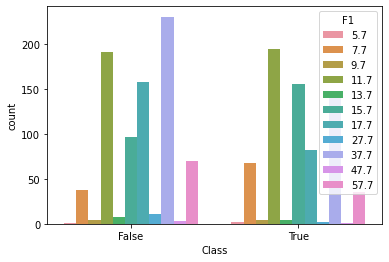

In [14]:
sns.countplot(x="Class", hue="F1", data=df_diabetes)

<AxesSubplot:xlabel='F9', ylabel='Count'>

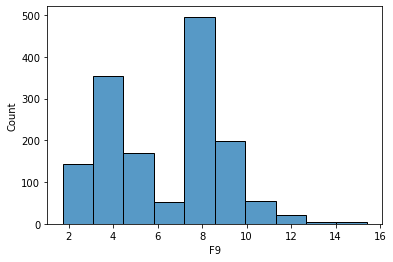

In [15]:
sns.histplot(df_diabetes["F9"], kde=False, bins=10)

## 3. Methods

### Model 1: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

### Evaluate Model 1

In [18]:
predictions_log = logmodel.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [20]:
print(classification_report(Y_test, predictions_log))

              precision    recall  f1-score   support

       False       0.84      0.85      0.85       170
        True       0.80      0.78      0.79       130

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



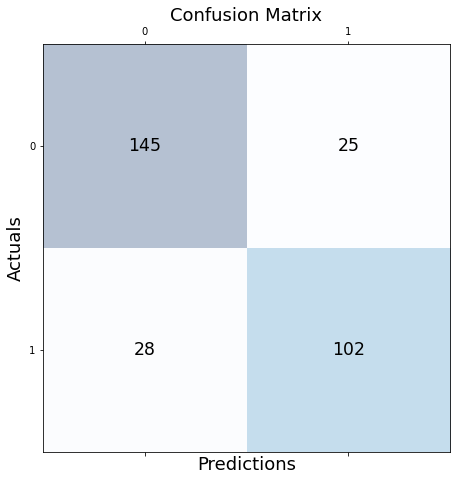

In [21]:
conf_matrix =(confusion_matrix(Y_test, predictions_log))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [22]:
f1_log = f1_score(Y_test, predictions_log)
print(f1_log)

0.7937743190661478


### Model 2: SVC

In [23]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')

In [24]:
sv.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
predictions_sv = sv.predict(X_test)

In [26]:
print(confusion_matrix(Y_test, predictions_sv))

[[141  29]
 [ 25 105]]


In [27]:
f1_sv = f1_score(Y_test, predictions_sv)
print(f1_sv)

0.7954545454545455


### Model 3: K Nearest Neighbors with tuning

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

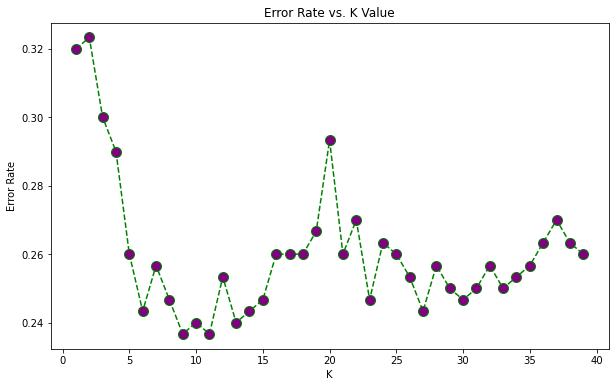

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Evaluate Model 3

In [32]:
predictions_knn2 = knn.predict(X_test)

In [33]:
print(classification_report(Y_test, predictions_knn2))

              precision    recall  f1-score   support

       False       0.76      0.79      0.78       170
        True       0.71      0.67      0.69       130

    accuracy                           0.74       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300



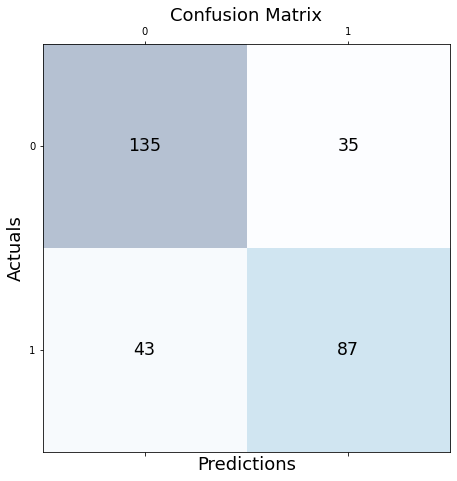

In [34]:
conf_matrix =(confusion_matrix(Y_test, predictions_knn2))
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [35]:
f1_knn2 = f1_score(Y_test, predictions_knn2)
print(f1_knn2)

0.6904761904761905


### Model 4: Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

### Evaluate Model 4

In [38]:
predictions_dt = dtree.predict(X_test)

In [39]:
print(classification_report(Y_test, predictions_dt))

              precision    recall  f1-score   support

       False       0.82      0.74      0.78       170
        True       0.70      0.79      0.74       130

    accuracy                           0.76       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.77      0.76      0.76       300



In [40]:
print(classification_report(Y_test, predictions_dt))

              precision    recall  f1-score   support

       False       0.82      0.74      0.78       170
        True       0.70      0.79      0.74       130

    accuracy                           0.76       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.77      0.76      0.76       300



In [41]:
f1_dt = f1_score(Y_test, predictions_dt)
print(f1_dt)

0.743682310469314


### Model 5: Random Forests

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

### Evaluate Model 5

In [44]:
predictions_rfc = rfc.predict(X_test)

In [45]:
print(classification_report(Y_test, predictions_rfc))

              precision    recall  f1-score   support

       False       0.90      0.84      0.87       170
        True       0.80      0.88      0.84       130

    accuracy                           0.86       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



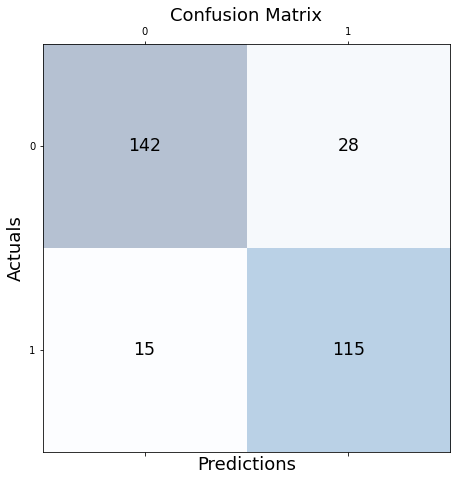

In [46]:
conf_matrix =(confusion_matrix(Y_test, predictions_rfc))
# Plotting the confusion matrix graph using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
f1_rfc = f1_score(Y_test, predictions_rfc)
print(f1_rfc)

0.8424908424908425


In [48]:
data = {"Method":["Logistic Regression", "SVM", "KNN2", "Decision Trees", "Random Forest"],
       "f1-score":[f1_log, f1_sv, f1_knn2, f1_dt, f1_rfc]}

results = pd.DataFrame(data)
print(results)

                Method  f1-score
0  Logistic Regression  0.793774
1                  SVM  0.795455
2                 KNN2  0.690476
3       Decision Trees  0.743682
4        Random Forest  0.842491


### Random Forest perfomed the best and we will use it to predict Test data

### ROC Analysis:

In [50]:
y_prob_train = logmodel.predict_proba(X_train)[:,1]

AUC of train:  0.9311619369614398


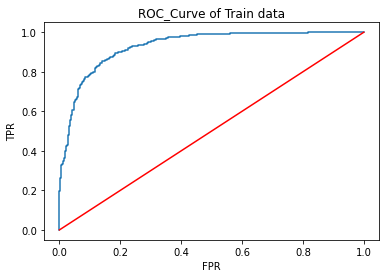

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

print('AUC of train: ', roc_auc_score(Y_train, y_prob_train)) #for train data

fpr, tpr, thresholds = roc_curve(Y_train, y_prob_train)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Train data')
plt.show()

In [52]:
# for X_test data
y_prob = logmodel.predict_proba(X_test)[:,1]

AUC of test:  0.9136651583710407


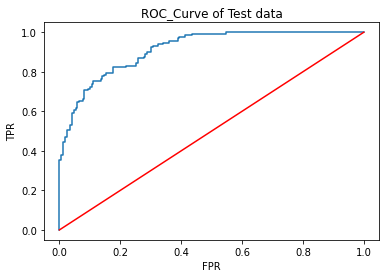

In [53]:
print('AUC of test: ', roc_auc_score(Y_test, y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Test data')
plt.show()

Text(0, 0.5, 'Feature')

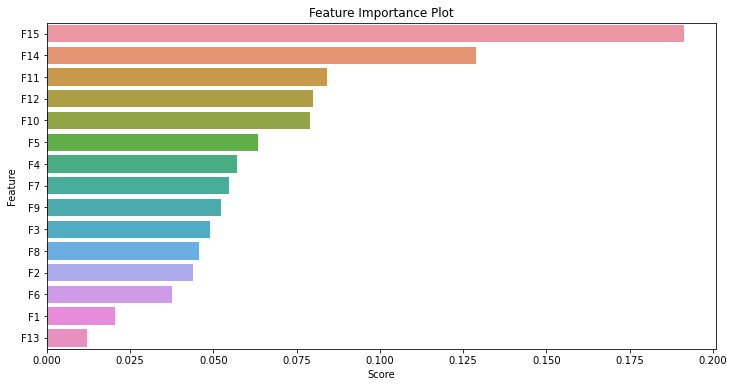

In [54]:
plt.figure(figsize=(12,6))
feature_imp = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_plot = sns.barplot(x = feature_imp, y = feature_imp.index)
feature_plot.set_title("Feature Importance Plot")
feature_plot.set_xlabel("Score")
feature_plot.set_ylabel("Feature")

### Now, we willl use logistic regression

In [56]:
#loading our test data
diabetes_test=pd.read_csv("CE802_P2_Test.csv")
diabetes_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,NaN
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,NaN
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,NaN
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,NaN
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,NaN


In [57]:
diabetes_test['F15'] = diabetes_test['F15'].fillna(0)

#### dropping the Uknown class so that we can predict 

In [58]:
main_cols = diabetes_test[diabetes_test.columns[:-1]]

In [59]:
new_class = logmodel.predict(main_cols)

#### Replace the NaN in Test Class columns with our predictions

In [60]:
diabetes_test['Class']= new_class 

In [61]:
diabetes_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,0.00,False
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,0.00,False
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,False
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,False
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,False


In [62]:
#creating test dataframe with prediction labels
diabetes_test.to_csv('CE802_P2_Test.csv', index = False)